<a href="https://colab.research.google.com/github/ccepelak/imdb-ratings/blob/main/Christine_Cepelak_Audible_Data_Science_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Movie Ratings Based on IMDb Data**

Developing a linear regression model which  predicts a movie’s average rating based on historical IMDb Data.

## 1. Loading & Exploring the Data

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, Ridge, RidgeCV


In [59]:
# Python program to convert .tsv file to .csv file
tsv_file1='title.basics.tsv'
tsv_file2='title.ratings.tsv'

# reading tsv files
csv_table1=pd.read_table(tsv_file1,sep='\t')
csv_table2=pd.read_table(tsv_file2,sep='\t')

# converting to csv
csv_table1.to_csv('title_basics.csv',index=False)
csv_table2.to_csv('title_ratings.csv',index=False)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [60]:
#loading new csv files
titles = pd.read_csv("title_basics.csv")

ratings = pd.read_csv("title_ratings.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [61]:
#Exploring the shape of the new dataframe
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1892
1,tt0000002,5.9,252
2,tt0000003,6.5,1686
3,tt0000004,5.7,165
4,tt0000005,6.2,2501


In [62]:
#Exploring the shape of the new dataframe

print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250670 entries, 0 to 1250669
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1250670 non-null  object 
 1   averageRating  1250670 non-null  float64
 2   numVotes       1250670 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 28.6+ MB
None


In [63]:
#Exploring the shape of the new dataframe

print(ratings.shape)

(1250670, 3)


In [64]:
#Exploring the new dataframe

print(ratings.describe())

       averageRating      numVotes
count   1.250670e+06  1.250670e+06
mean    6.914594e+00  1.003895e+03
std     1.391648e+00  1.683653e+04
min     1.000000e+00  5.000000e+00
25%     6.200000e+00  1.100000e+01
50%     7.100000e+00  2.400000e+01
75%     7.900000e+00  9.500000e+01
max     1.000000e+01  2.602914e+06


In [65]:
# Filter for rows where numVotes is greater than 1000 
new_ratings = ratings[(ratings["numVotes"] > 1000)]
print(new_ratings.head())

      tconst  averageRating  numVotes
0  tt0000001            5.7      1892
2  tt0000003            6.5      1686
4  tt0000005            6.2      2501
7  tt0000008            5.4      2029
9  tt0000010            6.9      6835


In [66]:
# Find the mean of the ratings given to each title
average_rating_df = new_ratings[["tconst", "averageRating"]].groupby('tconst').mean()

# Order the entries by highest average rating to lowest
sorted_average_ratings = average_rating_df.sort_values(by="averageRating", ascending=False)

# Look at top movies
print(sorted_average_ratings.head())

            averageRating
tconst                   
tt2301451            10.0
tt21043004           10.0
tt12187040            9.9
tt17521746            9.9
tt9898836             9.9


In [8]:
#Exploring the shape of the new dataframe
titles.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [67]:
#create a dataframe with only necessary data frmr titles.csv
titlesdf = pd.DataFrame(titles)

# Using DataFrame.loc[] create new DataFrame by specific column.
new_titles=titlesdf.loc[:, titlesdf.columns.drop(['titleType', 'endYear'])]
print(new_titles)

            tconst               primaryTitle              originalTitle  \
0        tt0000001                 Carmencita                 Carmencita   
1        tt0000002     Le clown et ses chiens     Le clown et ses chiens   
2        tt0000003             Pauvre Pierrot             Pauvre Pierrot   
3        tt0000004                Un bon bock                Un bon bock   
4        tt0000005           Blacksmith Scene           Blacksmith Scene   
...            ...                        ...                        ...   
9030855  tt9916848              Episode #3.17              Episode #3.17   
9030856  tt9916850              Episode #3.19              Episode #3.19   
9030857  tt9916852              Episode #3.20              Episode #3.20   
9030858  tt9916856                   The Wind                   The Wind   
9030859  tt9916880  Horrid Henry Knows It All  Horrid Henry Knows It All   

        isAdult startYear runtimeMinutes                      genres  
0             0 

In [68]:
# create a new df with title, genre, avg rating, and numVotes
new_complete_ratings = pd.merge(left=new_ratings, right=new_titles, left_on='tconst', right_on='tconst')

# What's the size of the output data?
new_complete_ratings.shape

(74116, 9)

In [69]:
new_complete_ratings.head()

,tconst,averageRating,numVotes,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000001,5.7,1892,Carmencita,Carmencita,0,1894,1,"Documentary,Short"
1,tt0000003,6.5,1686,Pauvre Pierrot,Pauvre Pierrot,0,1892,4,"Animation,Comedy,Romance"
2,tt0000005,6.2,2501,Blacksmith Scene,Blacksmith Scene,0,1893,1,"Comedy,Short"
3,tt0000008,5.4,2029,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,1,"Documentary,Short"
4,tt0000010,6.9,6835,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,1,"Documentary,Short"


In [70]:
# reset the index to 'tconst'
new_complete_ratings.set_index('tconst',inplace=True)

new_complete_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74116 entries, tt0000001 to tt9916362
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   averageRating   74116 non-null  float64
 1   numVotes        74116 non-null  int64  
 2   primaryTitle    74116 non-null  object 
 3   originalTitle   74116 non-null  object 
 4   isAdult         74116 non-null  object 
 5   startYear       74116 non-null  object 
 6   runtimeMinutes  74116 non-null  object 
 7   genres          74116 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 5.1+ MB


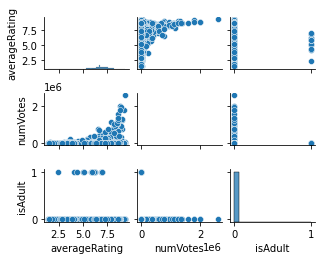

In [29]:
# visualizing some relationships

sns.pairplot(new_complete_ratings, height=1.2, aspect=1.25)
plt.savefig('pariplot.png');

In [71]:
# checking for the missing values in the dataset

new_complete_ratings.isna().any()

averageRating     False
numVotes          False
primaryTitle      False
originalTitle     False
isAdult           False
startYear         False
runtimeMinutes    False
genres            False
dtype: bool

In [72]:
#Removing the duplicate values in the datset

new_complete_ratings.drop_duplicates(inplace=True)
new_complete_ratings.shape


(74116, 8)

## 2. Features



In [73]:
new_complete_ratings.head()

,averageRating,numVotes,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
tconst,,,,,,,,
tt0000001,5.7,1892,Carmencita,Carmencita,0,1894,1,"Documentary,Short"
tt0000003,6.5,1686,Pauvre Pierrot,Pauvre Pierrot,0,1892,4,"Animation,Comedy,Romance"
tt0000005,6.2,2501,Blacksmith Scene,Blacksmith Scene,0,1893,1,"Comedy,Short"
tt0000008,5.4,2029,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,1,"Documentary,Short"
tt0000010,6.9,6835,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,1,"Documentary,Short"


In [74]:
new_complete_ratings['genres']=new_complete_ratings['genres'].str.split(',')

In [85]:
# explode string into rows 

df = new_complete_ratings.explode('genres')
#.drop_duplicates()
df.head()

,averageRating,numVotes,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
tconst,,,,,,,,
tt0000001,5.7,1892,Carmencita,Carmencita,0,1894,1,Documentary
tt0000001,5.7,1892,Carmencita,Carmencita,0,1894,1,Short
tt0000003,6.5,1686,Pauvre Pierrot,Pauvre Pierrot,0,1892,4,Animation
tt0000003,6.5,1686,Pauvre Pierrot,Pauvre Pierrot,0,1892,4,Comedy
tt0000003,6.5,1686,Pauvre Pierrot,Pauvre Pierrot,0,1892,4,Romance


In [86]:
# print list of all unique genres

print(df['genres'].unique())

['Documentary' 'Short' 'Animation' 'Comedy' 'Romance' 'Horror' 'Biography'
 'Fantasy' 'Drama' 'Family' 'Action' 'Adventure' 'Crime' 'Music' 'Sci-Fi'
 'Thriller' 'Mystery' 'History' 'War' 'Sport' 'Western' 'Musical'
 'Film-Noir' 'Talk-Show' 'Game-Show' 'News' 'Adult' 'Reality-TV' '\\N']


In [87]:
X = df[['genres']]

In [88]:
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,genres_Adult,genres_Adventure,genres_Animation,genres_Biography,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,...,genres_Reality-TV,genres_Romance,genres_Sci-Fi,genres_Short,genres_Sport,genres_Talk-Show,genres_Thriller,genres_War,genres_Western,genres_\N
tconst,,,,,,,,,,,,,,,,,,,,,
tt0000001,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
tt0000003,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0000003,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0000003,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [89]:
Y = df[['averageRating']]

In [90]:
#train linear regression model, print the intercept of the slope

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)

regr = linear_model.LinearRegression() 
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)

intercept = regr.intercept_
print(intercept)

[7.05012485]


In [92]:
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [[-1.63901374  0.14007789  0.52934768  0.04327357 -0.20638328  0.15694112
   0.36224755  0.10623736 -0.5082862   0.01576747 -0.05633174 -0.20260712
   0.19656319 -1.10142366 -0.11562671 -0.45749162  0.04253759 -0.07850323
  -0.65805686 -0.22791928 -0.49182276 -0.0516045  -0.20730025  0.10175015
  -0.77210428 -0.09493854 -0.35300133  0.07928692]]


In [93]:
predictions = regr.predict(X_test)
predictions

array([[6.55830209],
       [7.19020273],
       [7.1563622 ],
       ...,
       [7.06589231],
       [7.1563622 ],
       [7.19020273]])

In [97]:
from sklearn.metrics import mean_squared_error, r2_score

# mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, predictions))

# coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, predictions))

Mean squared error: 1.67
Coefficient of determination: 0.07


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


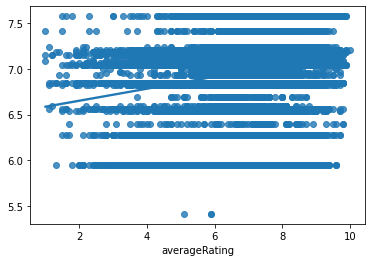

In [100]:
sns.regplot(Y_test,predictions)

In [101]:
import statsmodels.api as sm

X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)

ls=sm.OLS(Y_train,X_train_Sm).fit()
print(ls.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     356.5
Date:                Fri, 15 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:31:10   Log-Likelihood:            -2.4146e+05
No. Observations:              143896   AIC:                         4.830e+05
Df Residuals:                  143867   BIC:                         4.833e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  7.0501      0